In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df_modelo=pd.read_csv("./data.csv")

In [3]:
# elimino la variable nombre, ya que no aporta informacion relevante, y es importante dejar las mas importantes.
df_modelo.drop(columns =['Nombre'], axis=1, inplace=True)

In [4]:
# analizo y sumo, si existen valores faltantes
df_modelo.isna().sum()

Equipo                          0
Posicion                        0
Altura                          0
Edad                            0
Apariciones                     0
Goles                           0
Asistencias                     0
Tarjetas Amarillas              0
2da Tarjeta Amarillas           0
Tarjetas Rojas                  0
Goles Concedidos                0
Valla Invicta                   0
Minutos Jugados                 0
Dias De baja por Lesion         0
Partidos Perdidos por Lesion    0
Premios                         0
Valor Actual                    0
Valor Maximo                    0
Posicion Numero                 0
Extremo                         0
dtype: int64

In [5]:

# controlo si hay valores duplicados.
df_modelo.duplicated().sum()

0

In [6]:
# vuelvo a ver tipos de datos del df_modelo
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Equipo                        10754 non-null  object 
 1   Posicion                      10754 non-null  object 
 2   Altura                        10754 non-null  float64
 3   Edad                          10754 non-null  float64
 4   Apariciones                   10754 non-null  int64  
 5   Goles                         10754 non-null  float64
 6   Asistencias                   10754 non-null  float64
 7   Tarjetas Amarillas            10754 non-null  float64
 8   2da Tarjeta Amarillas         10754 non-null  float64
 9   Tarjetas Rojas                10754 non-null  float64
 10  Goles Concedidos              10754 non-null  float64
 11  Valla Invicta                 10754 non-null  float64
 12  Minutos Jugados               10754 non-null  int64  
 13  D

In [7]:
# importo labelencoder para poder codificar
from sklearn.preprocessing import LabelEncoder 


#Se crea un diccionario vacío llamado encoders el cual  almacenara objetos LabelEncoder para cada característica categórica.
encoders = {}

# variable que contiene los nombres de las variables categóricas que se desean codificar.
# En este caso, son las características 'Equipo' y 'Posicion'.
cat_features = ['Equipo', 'Posicion']
for feature in cat_features: 
    # se aplica la codificaciones y se agrega una columna al final las categorias codificadas
    encoders[feature] = LabelEncoder()
    df_modelo[feature +"_codificadas"] = encoders[feature].fit_transform(df_modelo[feature])

In [8]:
# MUESTRO LA COLUMNA DE  CODIFICACION DE VARIABLES,
df_modelo.Posicion_codificadas.head(2)

0    9
1    9
Name: Posicion_codificadas, dtype: int32

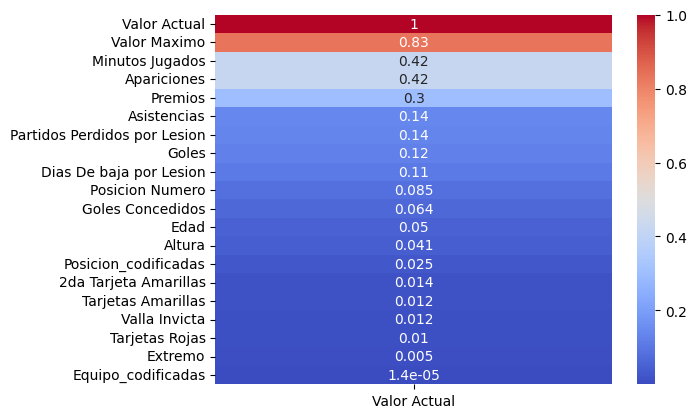

In [11]:
# SELECCION DE VARIABLES.

# elimino las columnas equipo y posicion de campo, ya que necesito las codificadas ahora
df_limpio = df_modelo.drop(columns=['Equipo', 'Posicion'], axis=1)

# calculo la correlacion entre las caracteristicas y el valor actual, ordenando descendente
corr = df_limpio.corr()['Valor Actual'].abs().sort_values(ascending=False)

# grafico el mapa de calor de correcciones
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm' )
plt.show()

In [12]:
# defino un parametro para dejar las variables mas significativas
threshold = .005

# CORRELACION entre caracteristicas y valor actual
corr = df_limpio.corr()['Valor Actual']

# guardo en variable las caracteristicas que tienen baja correlacion
caracteristicas_baja_corr = corr[abs(corr)<threshold].index
print(f"Se eliminan estas caracteristicas: {caracteristicas_baja_corr }")

# elimino las caracteristicas con baja correlacion, para ayudar a simplificar el modelo.
df_limpio.drop(columns=caracteristicas_baja_corr, inplace=True)

Se eliminan estas caracteristicas: Index(['Equipo_codificadas'], dtype='object')


In [13]:
# importo la funcion para preparar los datos de entrenamiento.
from sklearn.model_selection import train_test_split

# divido los datos que voy a utilizar en  prueba  y entrenamiento, y le doy tamaño al test
# elimino la variable que quiero predecir
X_train, X_test, y_train, y_test = train_test_split(df_limpio.drop('Valor Actual', axis=1), df_limpio['Valor Actual'], test_size= .2)


In [14]:
# Entrenamiento y evaluacion 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# pipeline  etapa de escalado de características (preparar y normalizar el modelo)
# modelo de Regresión con Bosques Aleatorios
# cantidad de número de árboles de decisión que se utilizarán en el modelo.

pipe = Pipeline([("scaler", StandardScaler()), ("regressor", RandomForestRegressor(n_estimators=150))])

# ajuste con datos de entrenamiento
pipe.fit(X_train, y_train)

# realizo predicciones 
y_pred = pipe.predict(X_test)

# calculo el r2 con  los resultados obtenidos ( analizo  la calidad del modelo )
r2_squared_score = r2_score(y_test, y_pred)

# muestro puntaja de rendimiento deL MODELO.
print(f"Puntuación de rendimiento del modelo RandomForestRegressor:: {r2_squared_score}")

Puntuación de rendimiento del modelo RandomForestRegressor:: 0.9204294152055467


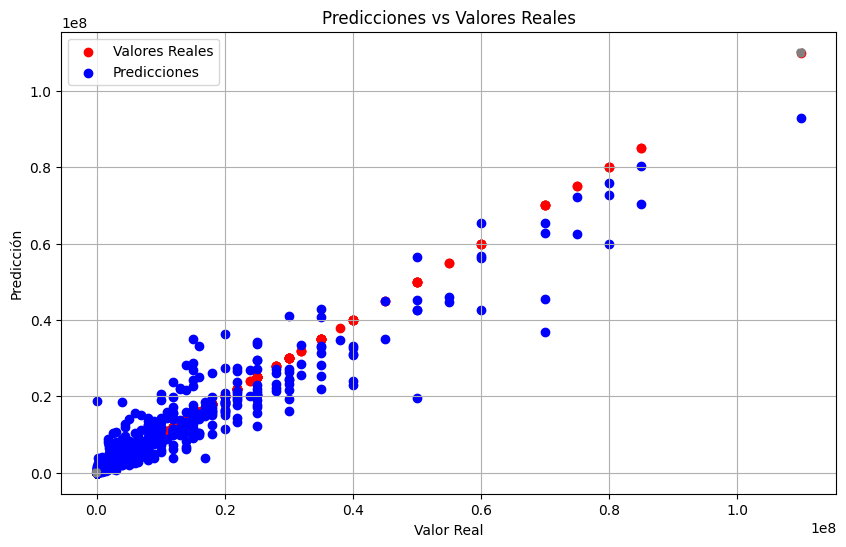

In [15]:
# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Gráfico scatter para valores reales
plt.scatter(y_test, y_test, color='red', label='Valores Reales')

# Gráfico scatter para predicciones
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')

# Línea diagonal de referencia
plt.scatter([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='gray', linestyle='--')

# Etiquetas y título
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones vs Valores Reales')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()